# House Valuation Tool for Home Buyers and Sellers

**Authors:** Ruthy Yao
***

![Banner](./images/Banner.PNG)

## Overview

The online real estate platform HomeConnect is looking to develop new functions and tools for its residential website so they can enhance the website user experience and increase the traffic. One idea is to create a housing valuation tool that allow users to self evaluate the houses they plan to buy or sell before they actually go to the market. They decided to use King County's property dataset to build a model as a trial. If the trial is successful, they will consider release it officially on their website. 

## Business Problem

HomeConnect's senior leadership team (SLT) highlighted three important things to consider for this house valuation model.  

* Reliability - The predicated house price from the model should explain as much as possible the variance with the actual sold price and minimize the prediction error. 
* Practicability - Users can easily input some housing price variables to work out the house value, i.e. the model shouldn't require the users to do any research in order to find out the value of the input.
* Insights - we should draw some insights from the model around what the high correlated features are with the house price so we can provide some value-add advices to the potentail home buyers and sellers.

The SLT doesn't quantify the model evaluation measurements. Hence, our data analytics team decide to use some external beachmark. Sepcifically, for "Reliability", we decide to use the adjusted R-squared - we aim for the model to have an adjusted R-squared of at least 60%. For the prediction error, we decided to use root mean square error (RMSE). Based on the our research, we think an RSME of \\$200k - \\$300k will be regarded as a good prediction.  Finally, For "Practicability", intuitively we think basic building parameters such as the property size, the number of bedrooms, etc should be the input variables. We will investigate the dataset to better define the input variables for the model. 

***

## Data Understanding 

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(color_codes=True)

In [159]:
df = pd.read_csv('data/kc_house_data.csv')

In [160]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [162]:
# Date refer to the house sold date. since the dtaa type is object, I'll extract the year from the date.
df['yr_sold'] = df['date'].apply(lambda x: x[-4:]).astype(int)

In [163]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


The dataset contains the data of 21,597 houses that were sold between 2014 and 2015. It provides the house selling price and a wide variety of characteristics for each house. The basic building parameters include the land size, living area size, basement size, the number of bedrooms and bathrooms, etc. It also provides the location features - longitude, latitude and zipcode. Finally, the house condition and grade of building quality are also included in the dataset.  

Some key findings from the data:
1. There are missing values for a couple of features, such as the year renovated, whether the house is waterfront property, etc. will investigate the missing data in the next step  - data cleaning.
2. Some houses have very large land - over 100k sqft. They might be farm land or ranges or simple input error. Will investigate the feature to decide if they are outliers.
3. Some houses were built before 1950 - over 60 years old. Generally speaking, hosue age has inverse relationship with house selling price. we will create a new feature for the age of the houses. 

## Data Cleaning

#### Remove the irrelevant columns

In [168]:
# `id` is the house id, not relevant for this predictive analysis. remove it. 
# remove `zipcode` as we will use latitude and longtitude as the location-based variables.
df.drop(['id','zipcode'], axis = 1,inplace= True)

#### Deal with missing value.

In [170]:
df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
yr_sold             0
dtype: int64

`waterfront`, `view` amd `yr_renovated` columns have null values. 

In [172]:
# In 'waterfront', there are 2376 out of 21597 - about 11% of the data have null value, which is quite big portion of the data. Assume those houses are not waterfront property, hence I'll fill the data with zero.
df['waterfront'] = df['waterfront'].fillna(0)

In [173]:
# In 'view', there are only 63 rows with na value, which is less than 0.5% of the dta, I'll remove the data with na value.
df.dropna(subset = ['view'],inplace = True)

In [174]:
# In 'yr_renovated', 3842 or 18% of the data has null value, which is significant. I'll assume the those houses are never renovated. Hence will fill it with zero. 
df['yr_renovated']= df['yr_renovated'].fillna(0)

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21534 non-null  object 
 1   price          21534 non-null  float64
 2   bedrooms       21534 non-null  int64  
 3   bathrooms      21534 non-null  float64
 4   sqft_living    21534 non-null  int64  
 5   sqft_lot       21534 non-null  int64  
 6   floors         21534 non-null  float64
 7   waterfront     21534 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21534 non-null  int64  
 10  grade          21534 non-null  int64  
 11  sqft_above     21534 non-null  int64  
 12  sqft_basement  21534 non-null  object 
 13  yr_built       21534 non-null  int64  
 14  yr_renovated   21534 non-null  float64
 15  lat            21534 non-null  float64
 16  long           21534 non-null  float64
 17  sqft_living15  21534 non-null  int64  
 18  sqft_lot15 

In [176]:
# Investigate why `sqft_basement` is not numeric.
df['sqft_basement'].value_counts()

sqft_basement
0.0       12798
?           452
600.0       216
500.0       209
700.0       207
          ...  
3480.0        1
1840.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 302, dtype: int64

In [177]:
# 452 rows or 2% of the data have"?" in the sqft_basement. I decide to replace it with the median value. 
mask = df[df['sqft_basement'] != '?']
mask['sqft_basement']=mask['sqft_basement'].astype(float)

C:\Users\zejia\AppData\Local\Temp\ipykernel_17808\3025938230.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mask['sqft_basement']=mask['sqft_basement'].astype(float)


In [178]:
mask['sqft_basement'].median()

0.0

In [179]:
df['sqft_basement'] = df['sqft_basement'].replace("\?", 291.36, regex=True)
df['sqft_basement']=df['sqft_basement'].astype(float)

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21534 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21534 non-null  object 
 1   price          21534 non-null  float64
 2   bedrooms       21534 non-null  int64  
 3   bathrooms      21534 non-null  float64
 4   sqft_living    21534 non-null  int64  
 5   sqft_lot       21534 non-null  int64  
 6   floors         21534 non-null  float64
 7   waterfront     21534 non-null  float64
 8   view           21534 non-null  float64
 9   condition      21534 non-null  int64  
 10  grade          21534 non-null  int64  
 11  sqft_above     21534 non-null  int64  
 12  sqft_basement  21534 non-null  float64
 13  yr_built       21534 non-null  int64  
 14  yr_renovated   21534 non-null  float64
 15  lat            21534 non-null  float64
 16  long           21534 non-null  float64
 17  sqft_living15  21534 non-null  int64  
 18  sqft_lot15 

#### Investigate Outliers

In [182]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sold
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,291.359976,1971.002275,68.866722,47.560180,-122.213948,1986.299944,12751.079502,2014.322560
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,437.344152,29.376044,364.314552,0.138528,0.140735,685.121001,27255.483308,0.467467
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471200,-122.328000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571900,-122.230000,1840.000000,7620.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,550.000000,1997.000000,0.000000,47.678100,-122.125000,2360.000000,10083.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


Some features such as `sqft_lot`, `sqft_living` have very large standard deviation. Let's use Z-score to identify the outliers.

In [184]:
#Identify and remove the outliers

outlier_columns = ['sqft_lot','sqft_living']

for column in outlier_columns:
    mean = df[column].mean()
    std = df[column].std()
    outliers = df[df[column]>= mean + 3 *std].index
    print(f'{len(outliers)} outliers detected in column {column}')
    df.drop(outliers,inplace = True)

344 outliers detected in column sqft_lot
233 outliers detected in column sqft_living


The maximum value in `bedrooms` is 33, which seems to be incorrect. Let's investigate.

In [186]:
df.loc[df['bedrooms'] ==33]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sold
15856,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,5,7,1040,580.0,1947,0.0,47.6878,-122.331,1330,4700,2014


In [187]:
# It could be typing error. I would assume it means to be 3 bedrooms.
df['bedrooms'] = df['bedrooms'].replace(33, 3, regex=True)

In [188]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_sold
count,2.095700e+04,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000,20957.000000
mean,5.213752e+05,3.356778,2.087202,2026.113232,10750.613303,1.487522,0.005821,0.216014,3.413466,7.610774,1744.159326,282.244169,1970.610774,68.477024,47.561107,-122.217525,1960.216682,10371.902372,2014.322708
std,3.105414e+05,0.894229,0.731969,812.836666,13519.809641,0.539457,0.076078,0.734290,0.651848,1.114252,754.060959,418.092708,29.400951,363.319408,0.138082,0.138433,655.028921,15792.624130,0.467523
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.512000,399.000000,651.000000,2014.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,47.473000,-122.330000,1480.000000,5047.000000,2014.000000
50%,4.470000e+05,3.000000,2.250000,1890.000000,7500.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1540.000000,0.000000,1974.000000,0.000000,47.572800,-122.236000,1820.000000,7532.000000,2014.000000
75%,6.300000e+05,4.000000,2.500000,2510.000000,10276.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2160.000000,530.000000,1996.000000,0.000000,47.678800,-122.130000,2330.000000,9864.000000,2015.000000
max,3.400000e+06,11.000000,7.500000,4770.000000,138085.000000,3.500000,1.000000,4.000000,5.000000,13.000000,4770.000000,2330.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,434728.000000,2015.000000


#### Feature Engineering

In [190]:
# For this house price prediction model, when the house is renovated is not relevant. Generally Speaking, if the house has been removated, it will uplift the value. Hence we care more about whether the house has been renovated. 
# I will convert the `yr_renovated` to boolean data - '1' being renovated', '0' being never renovated.
def is_renovated(year):
    if year == 0:
        return 0
    else:
        return 1

In [191]:
df['is_renovated'] = df['yr_renovated'].map(is_renovated)

In [192]:
# drop `yr_renovated` column
df.drop(['yr_renovated'], axis = 1,inplace= True)

In [193]:
# create a column that calculates the age of the house.
df['house_age'] = df['yr_sold']-df['yr_built']
# drop the irrelevant columns
df.drop(['date','yr_sold','yr_built'], axis = 1,inplace= True)

##### Create a `distance` feature

I'll use the latitude and longitude data to calculate the distance from a coordinate starting point.
Given that King County is in the state of Washington. Its county seat is Seattle. I'll use Seattle CBD as the origin of the coordinates. 

In [195]:
from math import sin, cos, sqrt, atan2, radians

In [196]:
df['lat'] = df['lat'].map(lambda x: radians(x))
df['long'] = df['long'].map(lambda x: radians(x))

In [197]:
df[['lat', 'long']].head()

,lat,long
0,0.829227,-2.133787
1,0.832889,-2.134869
2,0.833184,-2.133368
3,0.829394,-2.136161
4,0.831070,-2.130087


In [198]:
# Approximate radius of earth in km
R = 6373.0

#Seattle coordinates: 47.6061 N, 122.3328 W. 
lat1 = radians(47.6061)
long1 = radians(-122.3328)

def calc_distance(lat, long):
    dlat = lat - lat1
    dlong = long - long1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat) * sin(dlong / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    return distance

df['distance'] = df[['lat', 'long']].apply(lambda x: calc_distance(x['lat'], x['long']), axis=1)

In [199]:
df.drop(['lat','long'], axis = 1,inplace= True)

In [200]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,is_renovated,house_age,distance
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,0.0,1340,5650,0,59,11.991477
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1690,7639,1,63,12.822050
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,2720,8062,0,82,16.455789
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1360,5000,0,49,10.508825
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1800,7503,0,28,21.613787


In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20957 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          20957 non-null  float64
 1   bedrooms       20957 non-null  int64  
 2   bathrooms      20957 non-null  float64
 3   sqft_living    20957 non-null  int64  
 4   sqft_lot       20957 non-null  int64  
 5   floors         20957 non-null  float64
 6   waterfront     20957 non-null  float64
 7   view           20957 non-null  float64
 8   condition      20957 non-null  int64  
 9   grade          20957 non-null  int64  
 10  sqft_above     20957 non-null  int64  
 11  sqft_basement  20957 non-null  float64
 12  sqft_living15  20957 non-null  int64  
 13  sqft_lot15     20957 non-null  int64  
 14  is_renovated   20957 non-null  int64  
 15  house_age      20957 non-null  int64  
 16  distance       20957 non-null  float64
dtypes: float64(7), int64(10)
memory usage: 2.9 MB


## Model Development

Let's have a quick look of each of the variables correlation with price. 

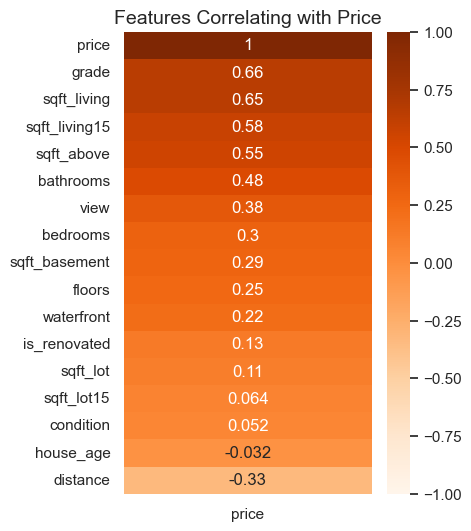

In [385]:
price_corr = df.corr()[['price']].sort_values(by='price', ascending=False)

plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(price_corr, vmin=-1, vmax=1,annot=True,cmap = 'Oranges')
heatmap.set_title('Features Correlating with Price', fontsize=14)
plt.savefig('./Images/Price_corr.png', bbox_inches='tight');

### Iteration 1

Run a first round of regression to see how good the independent variables contribute to the house price.

#### Split train and test sets

In [208]:
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#### Model Training

In [210]:
#Fit a linear regression on the train data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

#### Model Assessment

In [212]:
# Generate predictions on train and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

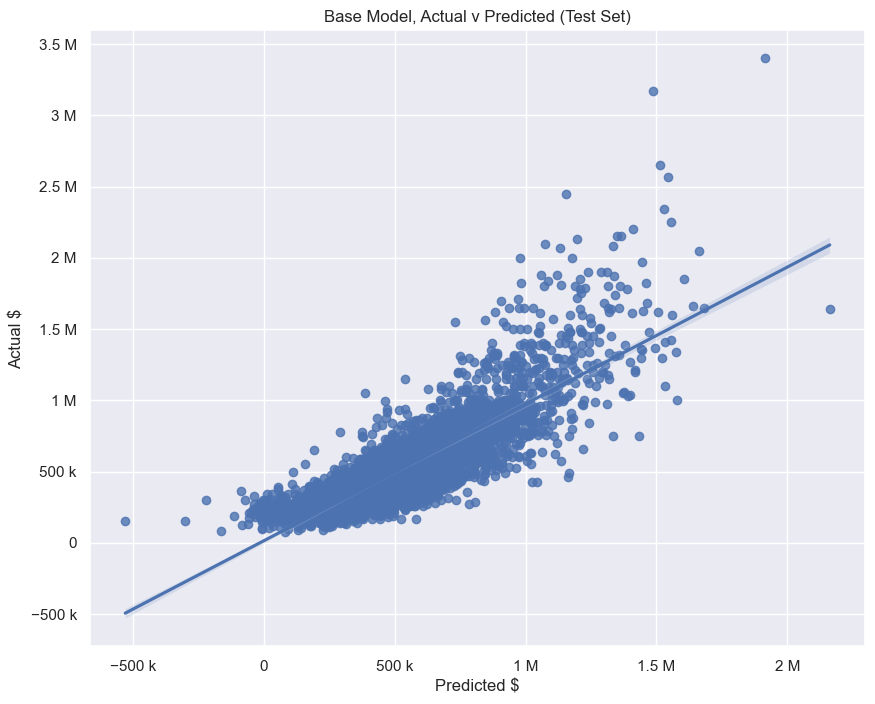

In [213]:
# Visualize the house price prediction.
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_test_pred, y = y_test)

plt.title('Base Model, Actual v Predicted (Test Set)')
plt.xlabel('Predicted $'), plt.ylabel('Actual $')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.savefig('./Images/Base_Model.png', bbox_inches='tight');

#### Create model evaluation matrix

In [215]:
from sklearn.metrics import mean_squared_error, r2_score
def get_score(Xtr, ytr, ytr_pred, ytst, ytst_pred):
    import math
    r2_train = r2_score(ytr, ytr_pred)
    r2_test = r2_score(ytst, ytst_pred)
    n,k = X_test.shape
    adj_r2 = 1-(1-r2_test) * (n-1)/(n-k-1)

    rmse_train = math.sqrt(mean_squared_error(ytr, ytr_pred))
    rmse_test = math.sqrt(mean_squared_error(ytst, ytst_pred))
    
    calcs = ["{:.2f}".format(r2_train), "{:.2f}".format(r2_test), "{:.2f}".format(adj_r2), rmse_train, rmse_test, k]
    
    return calcs

In [216]:
score_names = ['R2 Train', 'R2 Test', 'Adjusted R2', 'RMSE Train', 'RMSE Test', 'Num of Variables']
scores = get_score(X_train, y_train, y_train_pred, y_test, y_test_pred)
score_df = pd.DataFrame(scores, score_names).transpose()
score_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.70,0.70,0.70,172315.500511,160226.832618,16


70% of the house sale price can be explained by the predictors in the model, which is not too bad. 
The prediction error is \\$172k for the train set. The good thing is the test set's prediction error is not too much different from the train set's, which indicates that model is fitted well - not overfit or underfit.

Next, we need to refine the model to reduce the prediction error. 

### Iteration 2

Examine the data type and distribution of the variables and perform transformation and scaling if necessry to enhance the model precision.

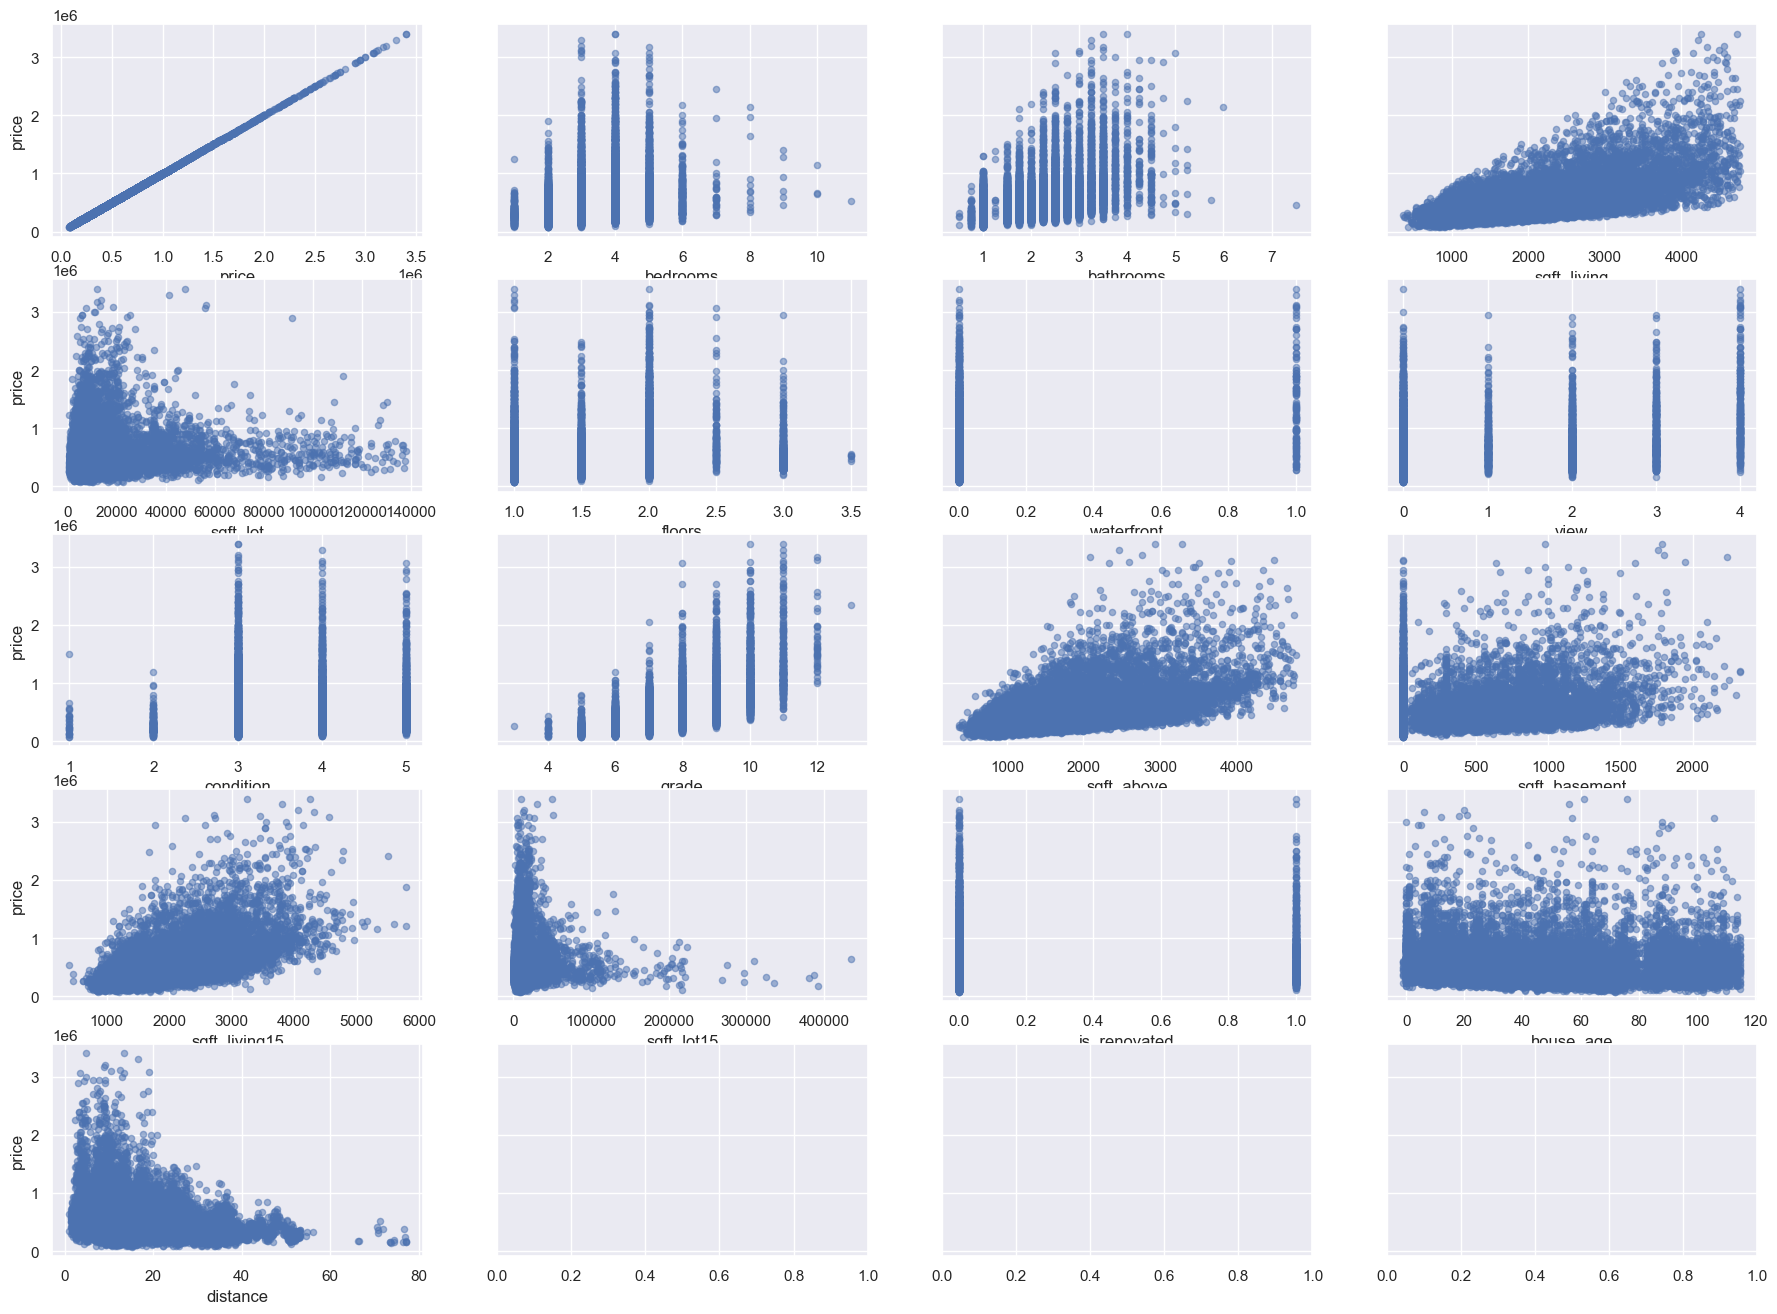

In [219]:
# Draw scatter plot to examine the relationship with the house price for each input variables.
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(22,16), sharey=True)
column_names = list(df.columns)
for col, ax in zip(column_names, axes.flatten()):
    df.plot(kind='scatter', x=col, y='price', ax=ax, alpha=0.5, color='b')

Some columns are numerical and some are categorical.

In [221]:
num_cols = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','distance','house_age']
cat_cols = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','is_renovated']

As all the categorical variables have already been assigned with a numerical value, no need for encoding. 

In [223]:
# It looks like there are a lot of zero value in `sqft_basement`
# Check how many rows have zero value.
df[df['sqft_basement'] ==0].count()

price            12492
bedrooms         12492
bathrooms        12492
sqft_living      12492
sqft_lot         12492
floors           12492
waterfront       12492
view             12492
condition        12492
grade            12492
sqft_above       12492
sqft_basement    12492
sqft_living15    12492
sqft_lot15       12492
is_renovated     12492
house_age        12492
distance         12492
dtype: int64

In [224]:
# 12492 data has zero value in the basement. I decided to fill in the zero with the average value of the dataset.
df['sqft_basement'].mean()

282.2441685355729

In [225]:
df['sqft_basement'] = df['sqft_basement'].replace(0,282.244)

In [226]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,is_renovated,house_age,distance
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1180,282.244,1340,5650,0,59,11.991477
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.000,1690,7639,1,63,12.822050
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,282.244,2720,8062,0,82,16.455789
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.000,1360,5000,0,49,10.508825
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,282.244,1800,7503,0,28,21.613787


array([[<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'distance'}>,
        <Axes: title={'center': 'house_age'}>, <Axes: >]], dtype=object)

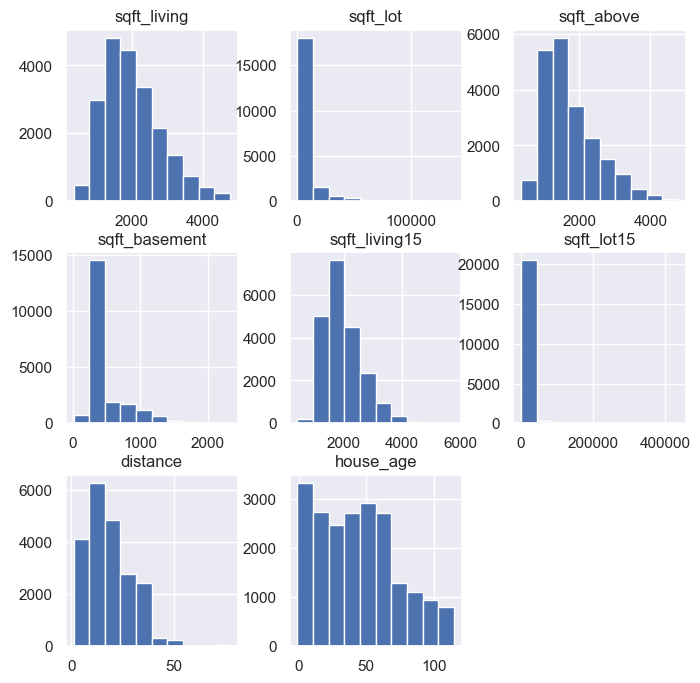

In [227]:
# Investigate the skewness of the continuous variables.
df[num_cols].hist(figsize  = [8, 8])

All the continuous variables are highly skewed. will performance feature transformation.

#### Feature scaling and transformation.

In [230]:
# Initialising the train and test split
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [231]:
# House price is a discret variable, I'll not perform log transformation. Instead, I will group it into categoricals
cont_cols = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15','distance']
cat_cols = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','is_renovated','house_age']

In [232]:
# perfrom log transform on the continous variables
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, validate=True)
X_train_log = log_transformer.fit_transform(X_train[cont_cols])
X_test_log = log_transformer.transform(X_test[cont_cols])

X_train_log = pd.DataFrame(X_train_log, columns = X_train[cont_cols].columns)
X_test_log = pd.DataFrame(X_test_log, columns = X_test[cont_cols].columns)

array([[<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'sqft_above'}>],
       [<Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'sqft_living15'}>,
        <Axes: title={'center': 'sqft_lot15'}>],
       [<Axes: title={'center': 'distance'}>, <Axes: >, <Axes: >]],
      dtype=object)

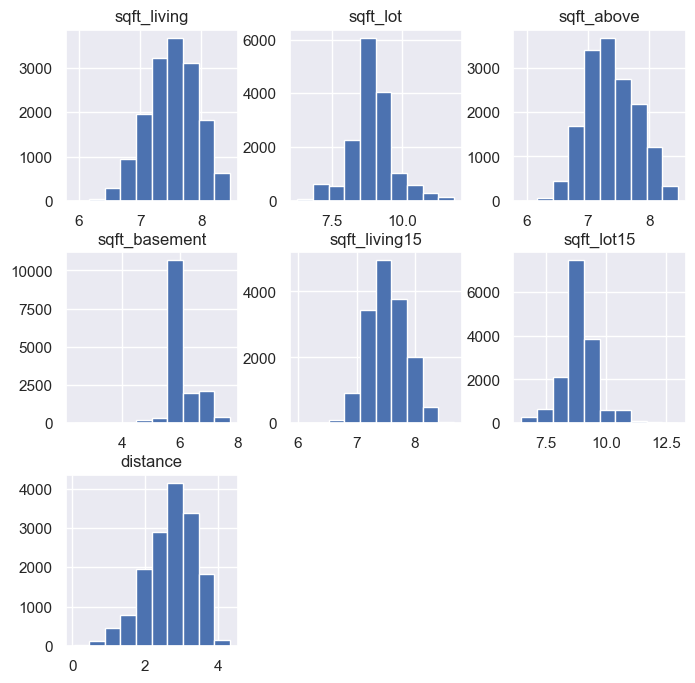

In [233]:
X_train_log[cont_cols].hist(figsize  = [8, 8])

In [234]:
# no transformation needed on the categorical variables.
X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]

In [235]:
# Concat the two subsets of data into one dataframe.
X_train = pd.concat([X_train_log.reset_index(drop = True),X_train_cat.reset_index(drop = True)], axis = 1)
X_test = pd.concat([X_test_log.reset_index(drop = True),X_test_cat.reset_index(drop = True)], axis = 1)

In [236]:
X_train

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,distance,bedrooms,bathrooms,floors,waterfront,view,condition,grade,is_renovated,house_age
0,7.659171,9.180500,7.222566,6.620073,7.455877,9.335827,2.546794,4,1.75,1.0,0.0,0.0,3,7,0,49
1,7.668561,8.955964,7.668561,5.642772,7.432484,8.958669,2.515669,4,2.50,2.0,0.0,0.0,3,8,0,18
2,8.019613,8.332068,7.762171,6.536692,7.893572,8.294050,3.221989,4,3.25,2.0,0.0,0.0,3,8,0,2
3,7.478735,9.077380,7.192934,6.086775,7.554859,9.072227,3.167388,3,2.25,1.0,0.0,0.0,3,8,0,33
4,7.659171,8.911934,6.966024,6.966024,7.339538,8.911934,2.722382,4,1.75,1.0,0.0,0.0,4,7,0,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15712,7.047517,8.929568,7.047517,5.642772,7.554859,9.005160,2.653149,2,1.50,1.0,0.0,1.0,3,7,0,71
15713,7.478735,9.196039,7.478735,5.642772,7.811973,9.196039,2.713938,4,2.50,1.0,0.0,2.0,3,8,0,44
15714,7.501082,8.006368,7.501082,5.642772,7.420579,8.006368,1.758429,5,3.00,2.0,0.0,0.0,3,7,0,16
15715,6.993933,8.820404,6.993933,5.642772,7.090077,8.515592,2.287443,2,1.00,1.0,0.0,0.0,3,6,0,60


In [237]:
X_test

,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15,distance,bedrooms,bathrooms,floors,waterfront,view,condition,grade,is_renovated,house_age
0,7.444249,8.188689,7.371489,4.787492,7.444249,8.188689,1.500442,3,2.75,1.0,0.0,0.0,3,7,0,105
1,7.731931,8.911530,7.731931,5.642772,7.770645,8.770750,3.337723,3,2.50,2.0,0.0,0.0,3,8,0,16
2,7.218910,6.993933,7.181592,3.912023,7.215240,7.024649,2.076967,3,2.50,3.0,0.0,0.0,3,7,0,11
3,7.649693,8.996528,7.649693,5.642772,7.649693,8.917847,3.442240,4,2.25,2.0,0.0,0.0,3,8,0,37
4,7.560080,9.160309,7.272398,6.173786,7.506592,9.160309,3.054036,3,1.75,1.0,0.0,0.0,3,8,0,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5235,7.668561,9.209340,7.668561,5.642772,7.630461,9.209340,3.359787,3,2.25,1.0,0.0,0.0,4,8,0,53
5236,7.390181,9.003562,7.390181,5.642772,7.560080,9.035987,2.920582,4,1.75,1.0,0.0,0.0,3,8,0,40
5237,7.478735,8.853665,7.478735,5.642772,7.319865,9.255505,3.432419,3,2.00,1.0,0.0,0.0,3,7,0,28
5238,7.444249,8.948976,7.444249,5.642772,7.333023,8.948976,2.645873,5,2.50,1.5,0.0,0.0,3,7,0,52


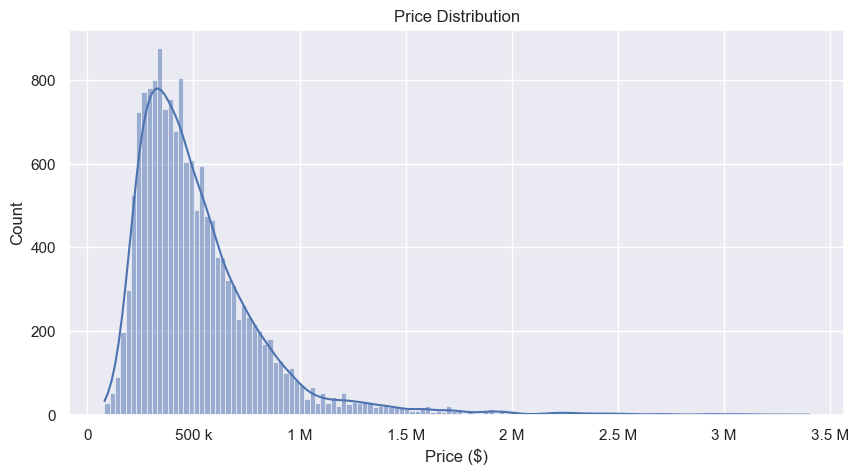

In [238]:
# Examine the house price distribution
import matplotlib.ticker as ticker

fig, ax = plt.subplots(figsize=(10,5))

sns.histplot(y_train, kde=True)
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.title('Price Distribution'), plt.xlabel('Price ($)')
plt.savefig('./Images/Price_Distribution.png', bbox_inches='tight');

In [239]:
y_train = np.log(y_train)
y_test = np.log(y_test)

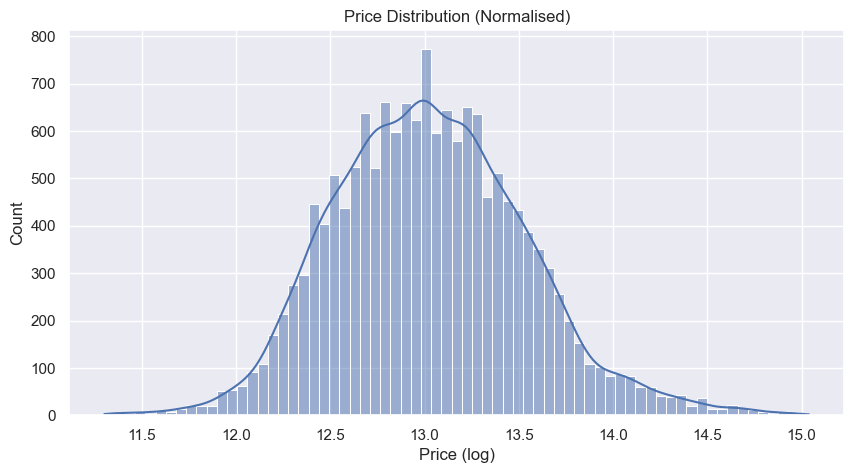

In [240]:
fig, ax = plt.subplots(figsize=(10,5))
sns.histplot(y_train, kde=True)
plt.title('Price Distribution (Normalised)'), plt.xlabel('Price (log)')
plt.savefig('./Images/Price_Dist_Normal.png', bbox_inches='tight');

In [241]:
#Fit a linear regression on the train data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Generate predictions on train and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [242]:
scores = get_score(X_train, y_train, y_train_pred, y_test, y_test_pred)
score_df.loc[len(score_df)] = scores
score_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.70,0.70,0.70,172315.500511,160226.832618,16
1,0.74,0.73,0.73,0.258316,0.259189,16


The R-squared is improved and the RMSE for the train set and test set are still close to each other, which is good.

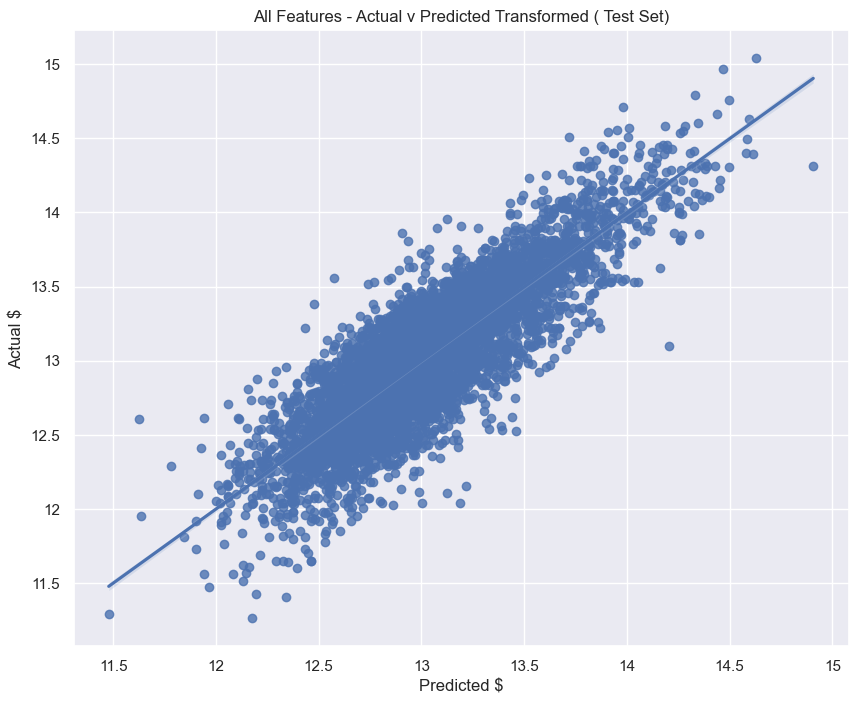

In [244]:
# Visualize the house price prediction.
import matplotlib.ticker as ticker
fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_test_pred, y = y_test)

plt.title('All Features - Actual v Predicted Transformed ( Test Set)')
plt.xlabel('Predicted $'), plt.ylabel('Actual $')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.savefig('./Images/Full Features_Model.png', bbox_inches='tight');

#### Feature Selection

Let's explore the optimal number of features to include in the model in order to achieve the highest R2.

Optimal number of features: 16


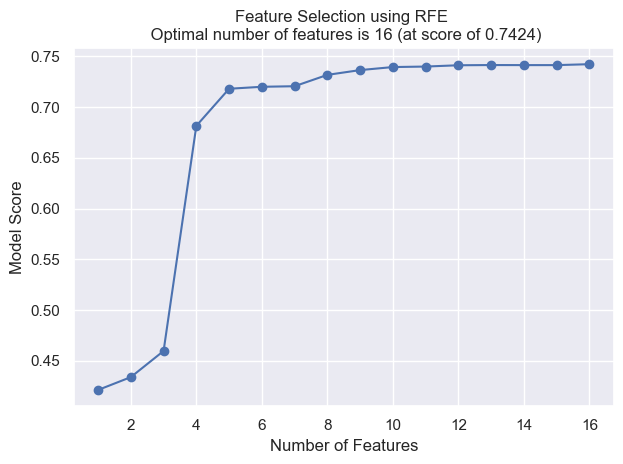

In [246]:

from sklearn.feature_selection import RFECV

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X_train,y_train)

optimal_feature_count = feature_selector.n_features_
print(f'Optimal number of features: {optimal_feature_count}')

X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()

Using the RFE method gives us the optimal features to be selected are all the 16 features in this model. The comprehsnive predicitve model explains 74% of the housing price with a prediction error of only 0.26.

### Iteration 3

Though the model's predicability is pretty good with an adjusted R2 of 0.74 on the test set, the model requires 16 input variables, which are over compliated for an user. 

Imagine someone wants to sell or buy a house, in most cases he/she won't know the average size of the surrounding 15 houses. Hence variables such as `sqft_living15` and `sqft_lot15` are not easily obtainable for an ordinary home buyer or seller. Likewise,  the building grade (`grade`), which is a classification by construction quality is not easily accessible by an ordinary home buyer seller either. Hence, this feature will be removed from the model.

Furthermore, features such as the house condition (`conditions`), whether the house has a good view (`view`) are very judgemental and should be isolated from the construction features that determine the fundamental price of a house. Hence we'll remove those features from the model.

In [250]:
# Initialising the train and test split
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [251]:
cont_cols = ['sqft_living','sqft_lot','sqft_above','sqft_basement','distance']
cat_cols = ['bedrooms','bathrooms','floors','waterfront','is_renovated','house_age']

In [252]:
# perfrom log transform on the continous variables
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, validate=True)
X_train_log = log_transformer.fit_transform(X_train[cont_cols])
X_test_log = log_transformer.transform(X_test[cont_cols])

X_train_log = pd.DataFrame(X_train_log, columns = X_train[cont_cols].columns)
X_test_log = pd.DataFrame(X_test_log, columns = X_test[cont_cols].columns)

In [253]:
X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]

In [254]:
X_train = pd.concat([X_train_log.reset_index(drop = True),X_train_cat.reset_index(drop = True)], axis = 1)
X_test = pd.concat([X_test_log.reset_index(drop = True),X_test_cat.reset_index(drop = True)], axis = 1)

In [255]:
y_train = np.log(y_train)
y_test = np.log(y_test)

In [256]:
#Fit a linear regression on the train data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Generate predictions on train and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [257]:
scores = get_score(X_train, y_train, y_train_pred, y_test, y_test_pred)
score_df.loc[len(score_df)] = scores
score_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.70,0.70,0.70,172315.500511,160226.832618,16
1,0.74,0.73,0.73,0.258316,0.259189,16
2,0.67,0.66,0.65,0.292328,0.291873,11


The simplified model has the adjsuted R2 dropped to 65%. The RMSE is increased due to drop of some features. 
However, from a practicality perspective, we need to build a simple and easy-to-use model for our platform users. Hence I would sacrifice certain accuracy to achieve the simplicity.  

#### Feature Selection

Optimal number of features: 9


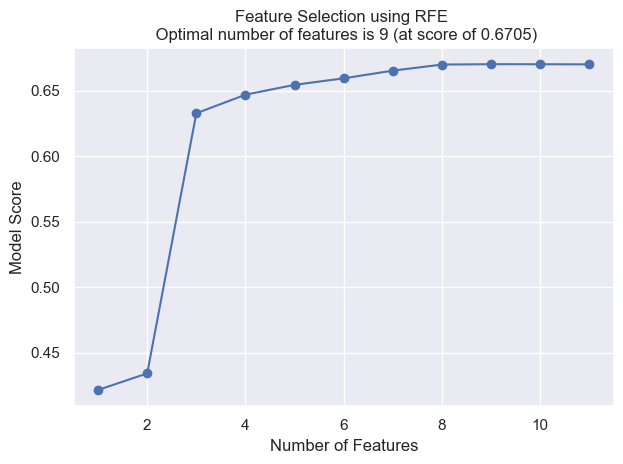

In [260]:

from sklearn.feature_selection import RFECV

regressor = LinearRegression()
feature_selector = RFECV(regressor)

fit = feature_selector.fit(X_train,y_train)

optimal_feature_count = feature_selector.n_features_
print(f'Optimal number of features: {optimal_feature_count}')

X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.show()

In [261]:
variables = pd.DataFrame([*cont_cols,*cat_cols], columns = ['variables'])
feature_selected = pd.concat([variables,pd.DataFrame(feature_selector.get_support(),columns=['selected'])], axis = 1)
feature_selected

,variables,selected
0,sqft_living,True
1,sqft_lot,True
2,sqft_above,True
3,sqft_basement,False
4,distance,True
5,bedrooms,True
6,bathrooms,True
7,floors,True
8,waterfront,True
9,is_renovated,True


Based on the RFE method, `sqft_basement` and`house_age` are eliminated, leaving 9 input variables in the model.

### Iteration 4

Let's see if we can further simplify the model. 

Our hypothesis is that the size of the above is correlated with size of the living area. so we keep only one of them in the model would be enough. Let's check if we can potentially remove `sqft_above`. 

Let's first check the correlation of between the two variables.

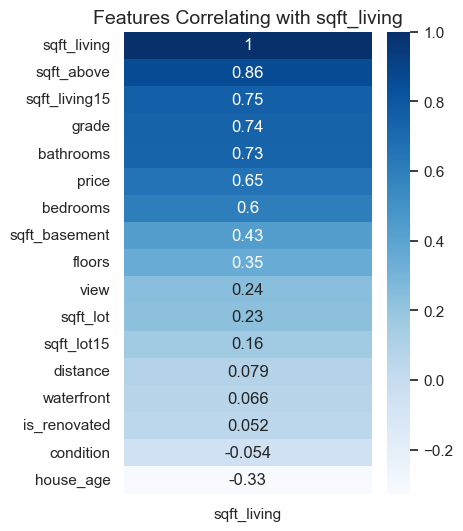

In [265]:
sqft_living_matrix = df.corr()[['sqft_living']].sort_values(by='sqft_living', ascending=False)
plt.figure(figsize=(4, 6))
heatmap = sns.heatmap(sqft_living_matrix,annot=True, cmap = 'Blues')
heatmap.set_title('Features Correlating with sqft_living', fontsize=14)
plt.savefig('./Images/sqft_living_corr.png', bbox_inches='tight');

As shown in the heatmap, `sqft_above` is highly correlated with `sqft_living`. I'll keep the `sqft_living` and remove `sqft_above` as the latter is actually part of the former.

In [267]:
# Initialising the train and test split
from sklearn.model_selection import train_test_split

X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [268]:
cont_cols = ['sqft_living','sqft_lot','distance']
cat_cols = ['bedrooms','bathrooms','floors','waterfront','is_renovated']

In [269]:
# perfrom log transform on the continous variables
from sklearn.preprocessing import FunctionTransformer

log_transformer = FunctionTransformer(np.log, validate=True)
X_train_log = log_transformer.fit_transform(X_train[cont_cols])
X_test_log = log_transformer.transform(X_test[cont_cols])

X_train_log = pd.DataFrame(X_train_log, columns = X_train[cont_cols].columns)
X_test_log = pd.DataFrame(X_test_log, columns = X_test[cont_cols].columns)

X_train_cat = X_train[cat_cols]
X_test_cat = X_test[cat_cols]

# concat the continuous variaable and the categorical variables.
X_train = pd.concat([X_train_log.reset_index(drop = True),X_train_cat.reset_index(drop = True)], axis = 1)
X_test = pd.concat([X_test_log.reset_index(drop = True),X_test_cat.reset_index(drop = True)], axis = 1)

# log transformation on the output variable
y_train = np.log(y_train)
y_test = np.log(y_test)

In [270]:
#Fit a linear regression on the train data
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

# Generate predictions on train and test sets
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

In [271]:
scores = get_score(X_train, y_train, y_train_pred, y_test, y_test_pred)
score_df.loc[len(score_df)] = scores
score_df

,R2 Train,R2 Test,Adjusted R2,RMSE Train,RMSE Test,Num of Variables
0,0.70,0.70,0.70,172315.500511,160226.832618,16
1,0.74,0.73,0.73,0.258316,0.259189,16
2,0.67,0.66,0.65,0.292328,0.291873,11
3,0.66,0.64,0.64,0.297052,0.296983,8


Drop `sqft_above` resulting in slighly decrease in R-squared and slightly increase in RMSE. Nevertheless, 64% of adjusted R-squared and 0.297 RMSE are still acceptable.

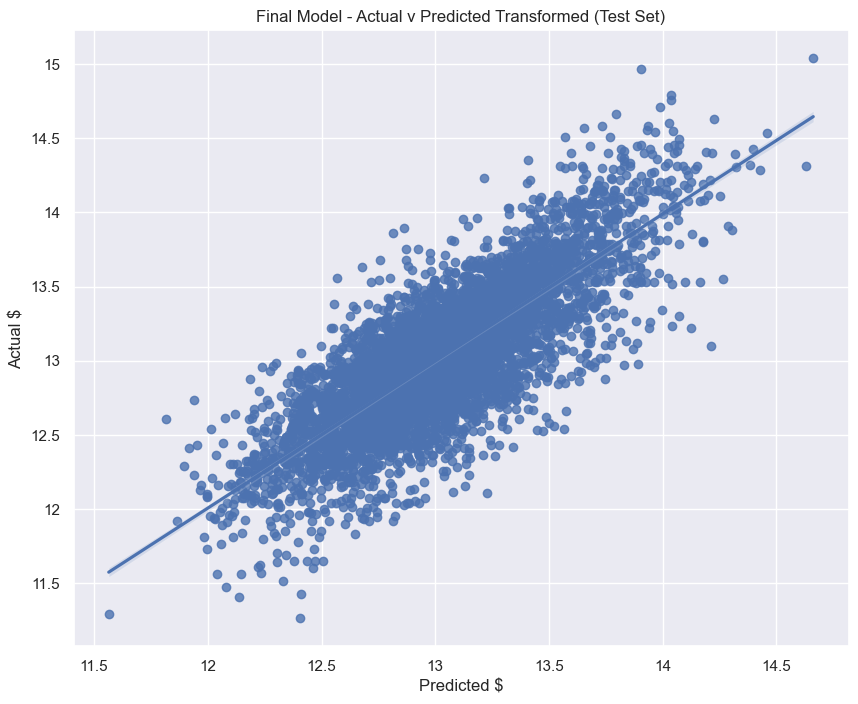

In [272]:
# Visualize the house price prediction.

fig, ax = plt.subplots(figsize= (10, 8))
sns.regplot(x = y_test_pred, y = y_test)

plt.title('Final Model - Actual v Predicted Transformed (Test Set)')
plt.xlabel('Predicted $'), plt.ylabel('Actual $')
ax.yaxis.set_major_formatter(ticker.EngFormatter())
ax.xaxis.set_major_formatter(ticker.EngFormatter())
plt.savefig('./Images/Final_Model.png', bbox_inches='tight');

#### Extract the model coefficients and intercept.

In [274]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

coeff_summary = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(linreg.coef_)], axis = 1)
coeff_summary.columns = ['input_variables','coefficient']
coeff_summary

,input_variables,coefficient
0,sqft_living,0.784052
1,sqft_lot,0.110202
2,distance,-0.393566
3,bedrooms,-0.068747
4,bathrooms,0.073729
5,floors,0.060837
6,waterfront,0.627783
7,is_renovated,0.064668


In [275]:
linreg.intercept_

7.18859220299581

In [276]:
# Getting the exponential of the log transformed columns in order to find their coefficients
X_train_exp =np.exp(X_train[cont_cols])
X_train_return = pd.concat([X_train_exp,X_train[cat_cols]], axis =1)
y_train_exp = np.exp(y_train)

In [277]:
linreg = LinearRegression()
linreg.fit(X_train_return, y_train_exp)
coeff_summary = pd.concat([pd.DataFrame(X_train_return.columns),pd.DataFrame(linreg.coef_)], axis = 1)
coeff_summary.columns = ['input_variables','coefficient']
coeff_summary

,input_variables,coefficient
0,sqft_living,268.174929
1,sqft_lot,1.215496
2,distance,-11542.310731
3,bedrooms,-43687.523173
4,bathrooms,22549.665787
5,floors,5327.534080
6,waterfront,689432.706624
7,is_renovated,90465.117861


In [278]:
linreg.intercept_

261976.0137162307

In [279]:
linreg = LinearRegression()
linreg.fit(X_train_return, y_train_exp)

y_train_pred_exp = np.exp(y_train_pred)
rmse = mean_squared_error(y_train_exp, y_train_pred_exp,squared=False)
print('RMSE: {:.2f}'.format(rmse))

RMSE: 185642.52


The prediciton error is $185k which is not small. This is potentially due to the removal of some of the features such as building quality grade, house condition, view etc. As we need to find a balance between the reliability of the prediction model and the practicability to the users, it's probably acceptible to trade off certain level of accuracy to make the model practical to users. 

* The data indicates that renovated waterfront property will greatly increase the house price - houses that are waterfront will push the price up by \\$690k; Renovation will boost the house price by \\$90k.
* House price is more sentitive to the size of the living space as opposed to the land size.
* What is counterintuitive is the negative coefficient when it comes to bedrooms.

Let's further investigate the relationship between bedrooms and the house price.


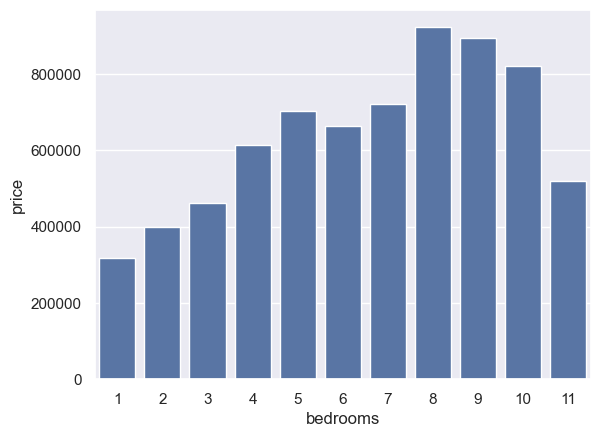

In [282]:
fig,ax = plt.subplots()
sns.barplot(data=df.groupby(['bedrooms'])[['price']].mean(),x="bedrooms",y="price")
plt.show()

For houses with 8 bedroods or under, more bedrooms will drive the house price up. However, for houses with 8 bedrooms or above, more bedrooms will push the price down. Those with over 8 bedrooms could be large farm houses which is not typical in the urban lifestyle. 

## Results and Insights

By applying the multilinear regression techniques, We created a property valuation tool for HomeConnect's website users. The tool selected 9 input variables accross the basic building parameters and location features. 

This house price valuation tool accomondates the requirement for both reliability and practicability. By incorporating 9 variables, the tool explains 65% of the housing price with a prediction error of $185k. All the 9 input variables can be easily obtained by home buyers and sellers without having to tab into any housing database or consult any industry experts. 

The model also identified the features that are have high correlation with the house price. Some key inisghts are:

* Being waterfront can substantially drive the house price up.
* Renovation can increase the house value.
* House price is more correlated with the size of the living area than the land size. 

Those pieces of insights could be very helpful to the users of this tool. For home buyers, they can use the insights to gauge their housing preference with their budget. For home sellers, they can use the insights to consider options to maximize their house value before putting it to the market for sale.

### Next Steps:

Additional dataset and further analysis will enhance the prediction of this tool and prepare it to be launched officially on HoneConnect's property website.

- **Categorize the houses into metro, regional and rural** - Houses in different regions display distinctive features. Adding a region parameter will help refine the model and reduce the prediction error.

- **Bring in the national geospatial data to the model** - Incorporate a geospatial dataset of the whole country which is a stepping stone for the tool to be officially published on the website.  

- **Incorporate condos or apartment housing data** - - Adding different housing types will enrich the data and enhance the usability of the tool.
